In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
%matplotlib inline 

In [2]:
A_df = pd.read_csv('/content/drive/MyDrive/ML 60 DAYS/final_2_files/A_lvr_land_A.csv')
B_df = pd.read_csv('/content/drive/MyDrive/ML 60 DAYS/final_2_files/B_lvr_land_A.csv')
E_df = pd.read_csv('/content/drive/MyDrive/ML 60 DAYS/final_2_files/E_lvr_land_A.csv')
F_df = pd.read_csv('/content/drive/MyDrive/ML 60 DAYS/final_2_files/F_lvr_land_A.csv')

print(A_df.shape)
print(B_df.shape)
print(E_df.shape)
print(F_df.shape)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,7,14,15,16,17,18,21,22,24,25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(8842, 32)
(16685, 32)
(14134, 32)
(19819, 32)


In [3]:
A_df.drop(axis=0,index=0,inplace=True)
B_df.drop(axis=0,index=0,inplace=True)
E_df.drop(axis=0,index=0,inplace=True)
F_df.drop(axis=0,index=0,inplace=True)

In [4]:
A_df['城市city'] = pd.DataFrame({'城市city':np.full((len(A_df)+1),'台北市Taipei')})
B_df['城市city'] = pd.DataFrame({'城市city':np.full((len(B_df)+1),'台中市Taichung')})
E_df['城市city'] = pd.DataFrame({'城市city':np.full((len(E_df)+1),'高雄市Kaohsiung')})
F_df['城市city'] = pd.DataFrame({'城市city':np.full((len(F_df)+1),'新北市New_Taipei')})

In [5]:
df = pd.concat([A_df,B_df,E_df,F_df])
df.shape

(59476, 33)

In [6]:
df.rename(columns={'鄉鎮市區':'towns',
'交易標的':'transaction_sign',
'土地區段位置建物區段門牌':'house_number',
'土地移轉總面積平方公尺':'land_area_square_meter', 
'都市土地使用分區':'use_zoning', 
'非都市土地使用分區':'land_use_district',
'非都市土地使用編定':'land_use',
'交易年月日':'tx_dt', 
 '交易筆棟數':'transaction_pen_number', 
 '移轉層次':'shifting_level', 
 '總樓層數':'total_floor_number', 
 '建物型態':'building_state', 
 '主要用途':'main_use', 
 '主要建材':'main_materials',
 '建築完成年月':'complete_date', 
 '建物移轉總面積平方公尺':'building_area_square_meter', 
 '建物現況格局-房':'room_number', 
 '建物現況格局-廳':'hall_number', 
 '建物現況格局-衛':'health_number', 
'建物現況格局-隔間':'compartmented_number', 
 '有無管理組織':'manages', 
 '總價元':'total_price', 
 '單價元平方公尺':'unit_price', 
 '車位類別':'berth_category', 
 '車位移轉總面積(平方公尺)':'berth_area_square_meter',
'車位總價元':'berth_price', 
 '備註':'note', 
 '編號':'serial_number', 
 '主建物面積':'main_building_area', 
 '附屬建物面積':'auxiliary_building_area', 
 '陽台面積':'balcony_area', 
 '電梯':'elevator','城市city':'city'
                  },inplace=True)
df.columns

Index(['towns', 'transaction_sign', 'house_number', 'land_area_square_meter',
       'use_zoning', 'land_use_district', 'land_use', 'tx_dt',
       'transaction_pen_number', 'shifting_level', 'total_floor_number',
       'building_state', 'main_use', 'main_materials', 'complete_date',
       'building_area_square_meter', 'room_number', 'hall_number',
       'health_number', 'compartmented_number', 'manages', 'total_price',
       'unit_price', 'berth_category', 'berth_area_square_meter',
       'berth_price', 'note', 'serial_number', 'main_building_area',
       'auxiliary_building_area', 'balcony_area', 'elevator', 'city'],
      dtype='object')

In [7]:
data = df.loc[(df.main_use == '住家用') & (df.use_zoning == '住')]

In [65]:
analysis_columns = data[['city','towns','main_use','use_zoning','total_price','building_area_square_meter',
                                     'main_building_area',
                                     'tx_dt','unit_price','room_number','hall_number','health_number']]
analysis_columns.shape

(7818, 12)

In [66]:
analysis_columns.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [67]:
analysis_columns = analysis_columns.astype({'total_price': 'int','unit_price':'float','building_area_square_meter':'float',
                                      'main_building_area': 'float',
                                      'room_number': 'int','hall_number': 'int','health_number': 'int'})

In [68]:
analysis_columns['tx_dt_year'] = analysis_columns.tx_dt.apply(lambda x:str(x)[:3])

In [69]:
analysis_columns = analysis_columns.loc[
                     (analysis_columns.tx_dt_year == '109')
                      &(analysis_columns.room_number >= 1)
                      &(analysis_columns.room_number <= 5)
                      &(analysis_columns.hall_number <= 2)
                      &(analysis_columns.hall_number >= 1)
                      ]

In [70]:
analysis_columns.reset_index(drop=True,inplace=True)

In [46]:
analysis_columns.building_area_square_meter = analysis_columns.building_area_square_meter.apply(lambda x:x*0.3025)
analysis_columns.main_building_area_square_meter = analysis_columns.building_area_square_meter.apply(lambda x:x*0.3025)
analysis_columns.unit_price = analysis_columns.unit_price.apply(lambda x:x/0.3025)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [75]:
analysis_columns.drop(analysis_columns.loc[(analysis_columns.total_price==0) | (analysis_columns.main_building_area == 0)].index,axis=0,inplace=True)

In [76]:
analysis_columns.describe()

,total_price,building_area_square_meter,main_building_area,unit_price,room_number,hall_number,health_number
count,6.854000e+03,6854.000000,6854.000000,6854.000000,6854.000000,6854.000000,6854.000000
mean,1.141669e+07,121.768404,82.565725,94548.453020,2.849869,1.793114,1.733149
std,1.161669e+07,62.849105,36.940424,58374.690321,0.898343,0.405103,0.680869
min,4.100000e+05,7.440000,7.440000,3239.000000,1.000000,1.000000,0.000000
25%,5.600000e+06,83.012500,61.062500,53597.250000,2.000000,2.000000,1.000000
50%,8.600000e+06,109.405000,79.110000,79742.500000,3.000000,2.000000,2.000000
75%,1.330000e+07,147.445000,95.970000,118880.000000,3.000000,2.000000,2.000000
max,2.250000e+08,1444.950000,335.760000,610104.000000,5.000000,2.000000,6.000000


In [112]:
tpe = analysis_columns.loc[analysis_columns.city == '台北市Taipei']
tpe.corr().total_price.sort_values(ascending=False).index[1],tpe.corr().unit_price.sort_values(ascending=False).index[1]

('building_area_square_meter', 'total_price')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20013 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24066 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21271 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 39640 missing from current font.
  font.set_

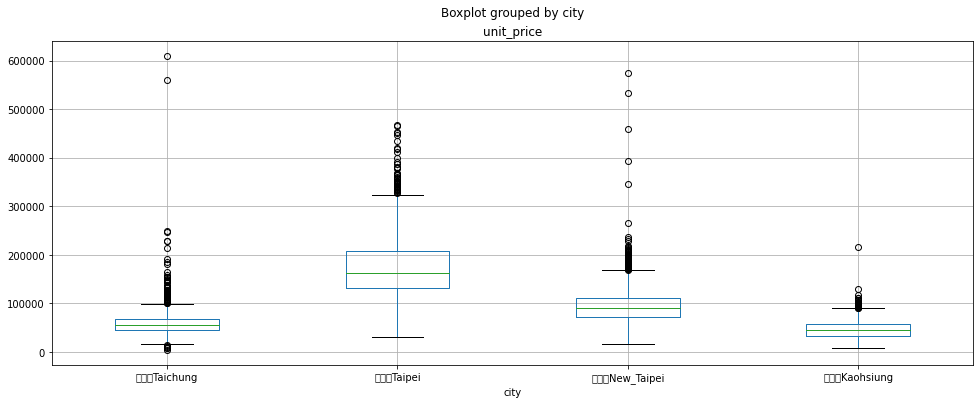

In [117]:
analysis_columns.boxplot(column=['unit_price'],by='city',figsize=(16,6))

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


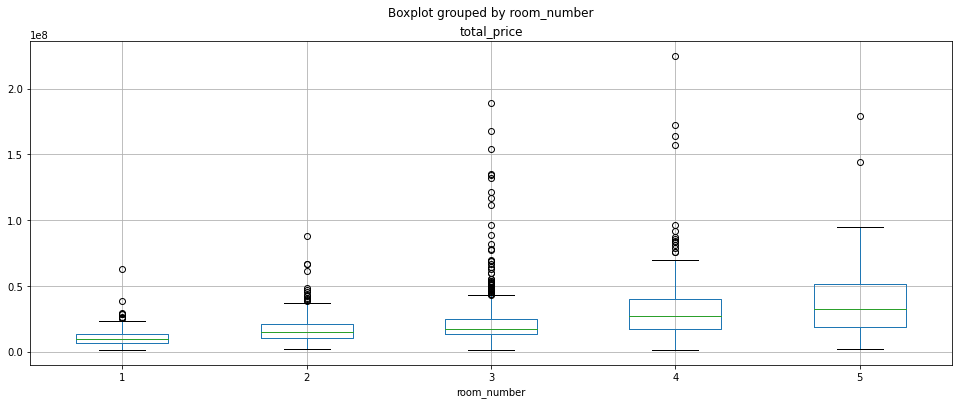

In [118]:
tpe.boxplot(column='total_price',by='room_number',figsize=(16,6))

In [123]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
tpe.towns = le.fit_transform(tpe.towns)
tpe.towns

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


0        9
1        9
2        9
3        9
4        9
        ..
1373    11
1374     3
1375     8
1376     2
1377     0
Name: towns, Length: 1376, dtype: int64

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


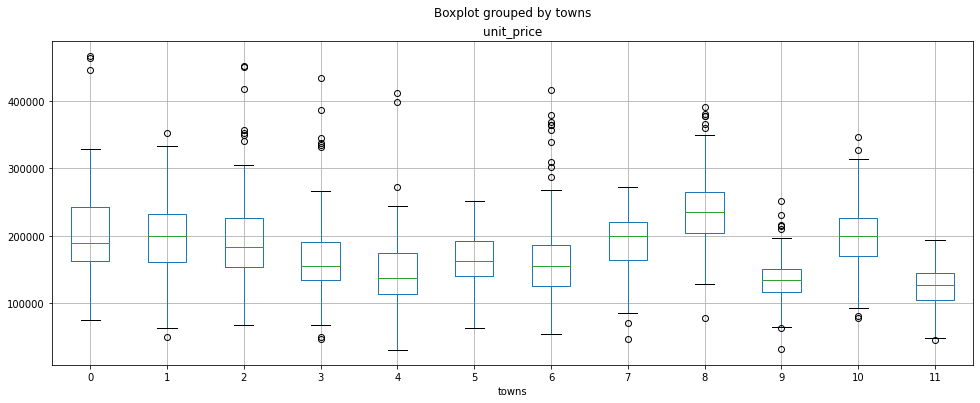

In [125]:
tpe.boxplot(column='unit_price',by='towns',figsize=(16,6))

In [135]:
tpe.groupby('towns').median()

,total_price,building_area_square_meter,main_building_area,unit_price,room_number,hall_number,health_number
towns,,,,,,,
0,17880000,107.580,89.490,188468.0,3,2,2
1,17350000,92.010,71.150,199055.0,3,2,2
2,17015000,99.540,82.160,182408.5,3,2,2
3,16800000,114.620,83.010,155340.0,3,2,2
4,15000000,112.560,90.660,137192.0,3,2,2
5,16080000,107.500,82.430,162308.0,3,2,2
6,16800000,114.150,89.140,154603.0,3,2,2
7,17700000,90.690,49.570,199557.0,2,2,1
8,26275000,113.395,87.870,235824.5,3,2,2


In [157]:
le.inverse_transform(tpe.towns)[tpe.towns.loc[tpe.towns==8].index[0]] #23

'大安區'